In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
row_per_class = 100
neurone_nb = 2

In [15]:
def get_dataset():
    # number of rows
    # generate rows
    sick = np.random.randn(row_per_class, 2) + np.array([-2, -2])
    sick2 = np.random.randn(row_per_class, 2) + np.array([2, 2])
    healthy = np.random.randn(row_per_class, 2) + np.array([-2, 2])
    healthy2 = np.random.randn(row_per_class, 2) + np.array([2, -2])
    
    features = np.vstack([sick, sick2, healthy, healthy2])
    targets = np.concatenate((np.zeros(row_per_class*2), np.ones(row_per_class*2)))
    
    return features, targets

In [16]:
def init_variables(nb_features, hidden_layer_size):
    """
        Init model variables (weights and bias)
        **input: **
            *nb_features: (Integer) Numbers of inputs/features
            *hidden_layer_size: (Integer) Numbers of Unit in the hidden layer
    """
    w1 = np.random.randn(nb_features, hidden_layer_size)
    b1 = np.zeros(hidden_layer_size)
    w2 = np.random.randn(hidden_layer_size)
    b2 = np.zeros(1)
    return w1, b1, w2, b2

In [17]:
def pre_activation(features, weights, bias):
    
    return np.dot(features, weights) + bias

In [18]:
def activation(z):
    return 1/(1+np.exp(-z))    

In [19]:
def class_predict(features, w1, b1, w2, b2):
    """
        Predict the class
        **input: **
            *features: (Numpy Matrix)
            *w1: (Numpy Matrix)
            *b1: (Numpy vector)
            *w2: (Numpy vector)
            *b2: (Numpy scalar)
        **return: (Numpy vector)**
            *0 or 1
    """
    z1 = pre_activation(features, w1, b1)
    a1 = activation(z1)
    z2 = pre_activation(a1, w2, b2)
    y = activation(z2)
    return z1, a1, z2, y, np.round(y)

In [21]:
def cost(predictions, targets):
    return np.mean((predictions - targets)**2)

In [22]:
def derivative_activation(z):
    return activation(z) * (1 - activation(z))

In [37]:
def train(features, targets, w1, b1, w2, b2):
    epochs = 100
    learning_rate = 0.1
    
    # print accuracy
    z1, a1, z2, y, predictions = class_predict(features, w1, b1, w2, b2)
    print("Accuray : ", (np.mean(predictions == targets)))
    
    # plot points
    plt.scatter(features[:, 0], features[:, 1], s=40, c=targets, cmap=plt.cm.Spectral)
    plt.show()
    
    for ep in range(epochs):
        if ep % 10 == 0:
            z1, a1, z2, y, predictions = class_predict(features, w1, b1, w2, b2)
            print("Cost : ", cost(predictions, targets))
        # init gradient
        w1_gradients = np.zeros(w1.shape)
        b1_gradients = np.zeros(b1.shape)
        w2_gradients = np.zeros(w2.shape)
        b2_gradients = np.zeros(b2.shape)
        
        for feature, target in zip(features, targets):
            z1, a1, z2, y, predictions = class_predict(feature, w1, b1, w2, b2)
            error_term = (y - target)
            error_term_output = error_term * derivative_activation(z2)
            error_term_hidden = error_term_output * w2 * derivative_activation(z1)
            
            # update gradient
            w1_gradients += error_term_hidden * feature[:, None]
            b1_gradients += error_term_hidden
            w2_gradients += error_term_output * a1
            b2_gradients += error_term_output
                        
        # update variables
        w1 = w1 - (learning_rate * w1_gradients)
        b1 = b1 - (learning_rate * b1_gradients)
        w2 = w2 - (learning_rate * w2_gradients)
        b2 = b2 - (learning_rate * b2_gradients)
    
    # print accuracy
    z1, a1, z2, y, predictions = class_predict(features, w1, b1, w2, b2)
    print("Accuray : ", (np.mean(predictions == targets)))
        

Accuray :  0.5


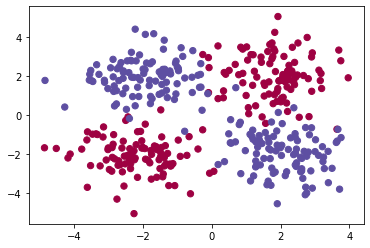

Cost :  0.5
Cost :  0.5
Cost :  0.1225
Cost :  0.08
Cost :  0.06
Cost :  0.045
Cost :  0.0475
Cost :  0.045
Cost :  0.0475
Cost :  0.0475
Accuray :  0.95


In [38]:
features, targets = get_dataset()
w1, b1, w2, b2 = init_variables(2, 3)
train(features, targets, w1, b1, w2, b2)